In [1]:
import gemmi

from rdkit import Chem
from rdkit.Chem import rdSubstructLibrary

from pdb_search import block_to_mol
from pdb_split import split_into_residues

from collections import defaultdict

import mols2grid

In [2]:
doc = gemmi.cif.read_file('/Users/richard/Downloads/Components-rel-alt.cif')

blocks = {b.name: b for b in doc}

In [3]:
l = rdSubstructLibrary.SubstructLibrary()

for b in doc:
    # TODOO: Actually, enumerate possible fragments based on combinations of leaving groups?
    m = block_to_mol(b, exclude_leaving_atoms=True)
    
    l.AddMol(m)

In [4]:
m = Chem.MolFromPDBFile('./4E43.pdb')

residues = split_into_residues(m)

In [5]:
p = Chem.SubstructMatchParameters()

In [7]:
dir(p)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'aromaticMatchesConjugated',
 'maxMatches',
 'numThreads',
 'recursionPossible',
 'setExtraFinalCheck',
 'uniquify',
 'useChirality',
 'useEnhancedStereo',
 'useGenericMatchers',
 'useQueryQueryMatches']

In [8]:
p.aromaticMatchesConjugated = True

In [22]:
sum(l.HasMatch(Chem.RemoveHs(r), p) for r in residues)

396

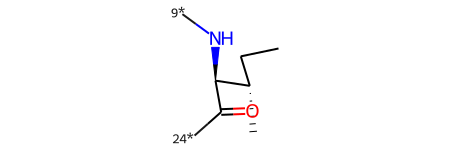

In [ ]:
fails = []

In [27]:
p = Chem.rdmolops.AdjustQueryParameters()

#p.makeAtomsGeneric = True
#p.makeBondsGeneric = True
p.makeDummiesQueries = True
p.setMDLFiveRingAromaticity = True

In [28]:
newfail = Chem.rdmolops.AdjustQueryProperties(fails[0], p)

NameError: name 'fails' is not defined

In [108]:
mols2grid.display([newfail])

MolGridWidget()

In [113]:
l.HasMatch(newfail, useChirality=False, useQueryQueryMatches=True)

False

In [28]:
mols2grid.display(fails)

MolGridWidget()

In [117]:
mols2grid.display([newfail, Chem.RemoveHs(block_to_mol(doc['TRP'], exclude_leaving_atoms=True))])

MolGridWidget()

In [125]:
ref = Chem.RemoveHs(block_to_mol(doc['TRP'], exclude_leaving_atoms=True))

In [126]:
Chem.MolToSmiles(newfail)

'[33*]N[C@@H](Cc1c[nH]c2ccccc12)C([53*])=O'

In [127]:
Chem.MolToSmiles(ref)

'*N[C@@H](Cc1c[nH]c2ccccc12)C(*)=O'

In [36]:
Chem.RemoveHs?

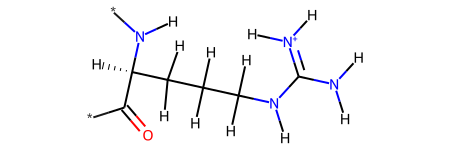

In [18]:
Chem.MolFromSmarts(Chem.MolToSmarts(m))

In [20]:
l.HasMatch(m)

True

In [ ]:
l.

In [4]:
m2 = block_to_mol(blocks['ARG'])

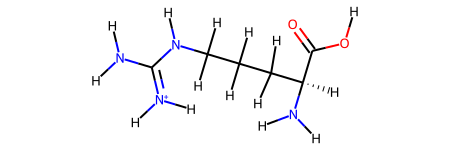

In [5]:
m2

In [6]:
l.HasMatch(m2, useChirality=False, useQueryQueryMatches=True)

False

In [26]:
params = {'useGenericMatchers': True}

In [28]:
l.HasMatch(m2, parameters=params)

ArgumentError: Python argument types in
    SubstructLibrary.HasMatch(SubstructLibrary, Mol)
did not match C++ signature:
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::MolBundle query, unsigned int startIdx, unsigned int endIdx, RDKit::SubstructMatchParameters parameters, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::MolBundle query, RDKit::SubstructMatchParameters parameters, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::MolBundle query, unsigned int startIdx, unsigned int endIdx, bool recursionPossible=True, bool useChirality=True, bool useQueryQueryMatches=False, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::MolBundle query, bool recursionPossible=True, bool useChirality=True, bool useQueryQueryMatches=False, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::TautomerQuery query, unsigned int startIdx, unsigned int endIdx, RDKit::SubstructMatchParameters parameters, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::TautomerQuery query, RDKit::SubstructMatchParameters parameters, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::TautomerQuery query, unsigned int startIdx, unsigned int endIdx, bool recursionPossible=True, bool useChirality=True, bool useQueryQueryMatches=False, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::TautomerQuery query, bool recursionPossible=True, bool useChirality=True, bool useQueryQueryMatches=False, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::ROMol query, unsigned int startIdx, unsigned int endIdx, RDKit::SubstructMatchParameters parameters, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::ROMol query, RDKit::SubstructMatchParameters parameters, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::ROMol query, unsigned int startIdx, unsigned int endIdx, bool recursionPossible=True, bool useChirality=True, bool useQueryQueryMatches=False, int numThreads=-1)
    HasMatch(RDKit::SubstructLibraryWrap {lvalue}, RDKit::ROMol query, bool recursionPossible=True, bool useChirality=True, bool useQueryQueryMatches=False, int numThreads=-1)